In [32]:
import numpy as np
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Dataset generation

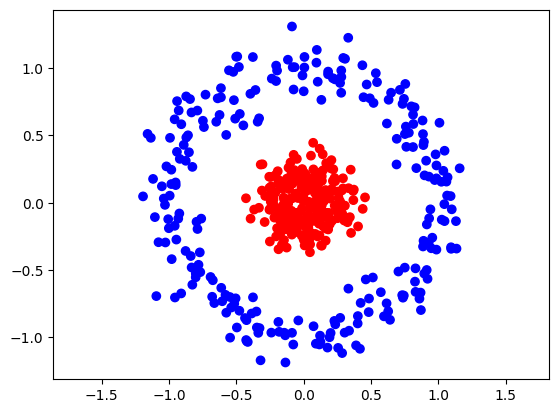

In [26]:
X, y = make_circles(n_samples=500, noise=0.1, random_state=42, factor=0.2) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
plt.scatter(X[:,0], X[:,1], c=y, cmap=colors.ListedColormap(["blue", "red"])) 
plt.axis('equal') 
plt.show() 

## Task 1

In [12]:
class AdaBoost:
    def __init__(self, n_estimators=50, eta=0.5):
        self.n_estimators = n_estimators
        self.eta = eta
        self.alphas = []
        self.models = []
    
    def fit(self, X, y, mdl):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples   # initialise as 1
        
        for _ in range(self.n_estimators):
            model = mdl(max_depth=1)   # start with decision stump
            model.fit(X, y, sample_weight=w)
            y_pred = model.predict(X)
            
            # Compute the error
            error = np.dot(w, (y_pred != y).astype(float)) / np.sum(w)
            
            # Compute alpha (model weight)
            alpha = self.eta * np.log((1 - error) / (error + 1e-10))  # Add a small term to avoid division by zero
            self.alphas.append(alpha)
            self.models.append(model)
            
            # Update sample weights
            w *= np.exp(alpha * (y_pred != y).astype(float))
            w /= np.sum(w)    # Normalize weights
    
    def predict(self, X):
        # Initialize predictions
        pred = np.zeros(X.shape[0])
        
        # Weighted sum of predictions from all weak classifiers
        for alpha, model in zip(self.alphas, self.models):
            pred += alpha * model.predict(X)
        
        # Return final prediction as sign of the weighted sum
        return np.sign(pred)

In [28]:
# Train AdaBoost model
adaboost = AdaBoost(n_estimators=100, eta=0.9)
adaboost.fit(X_train, y_train, DecisionTreeClassifier)

# Make predictions
y_pred_train = adaboost.predict(X_train)
y_pred_test = adaboost.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.4825
Test Accuracy: 0.5700


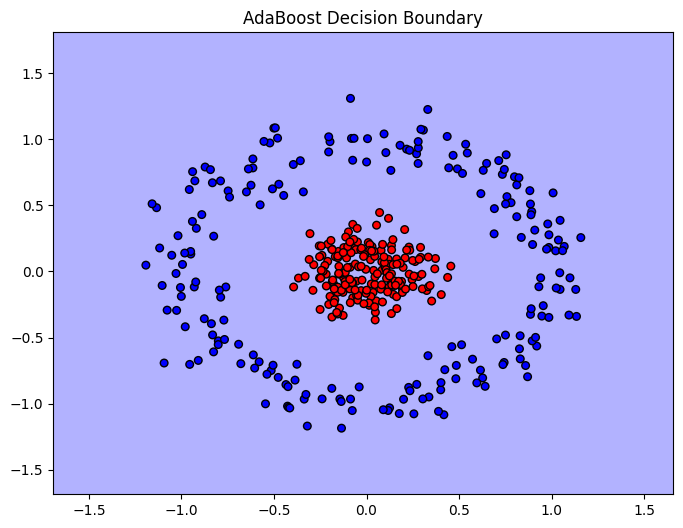

In [33]:
def plot_decision_boundary(X, y, model, ax):
    # Create a meshgrid to plot decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Use the model to predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('blue', 'red')))
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=ListedColormap(('blue', 'red')))
    ax.set_xlim(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    ax.set_ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)
    ax.set_title('AdaBoost Decision Boundary')

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(X_train, y_train, adaboost, ax)
plt.show()